In [1]:
pip install numpy opencv-python torch torchvision pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 17265 (delta 46), reused 10 (delta 10), pack-reused 17173 (from 5)
Receiving objects: 100% (17265/17265), 16.01 MiB | 31.05 MiB/s, done.
Resolving deltas: 100% (11796/11796), done.


In [3]:
%cd yolov5

/kaggle/working/yolov5


In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 16.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
path = '/kaggle/input/train-data/_annotations.csv'
annotations = pd.read_csv(path)
annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ce07a8df524a268d_jpg.rf.947f410ca61c8d156ec516...,640,640,Shotgun,35,258,640,399
1,7ba5a8ecd29f9b92_jpg.rf.9499a4ff456103b2a2eb85...,640,640,Knife,0,388,195,609
2,f445a026b2203795_jpg.rf.94ac72d3474ef0bfb77074...,640,640,Handgun,156,322,261,459
3,76aa5be0745ad2b9_jpg.rf.94e0a0b8c39d20e541678e...,640,640,Handgun,85,146,635,480
4,a95333b38a656d0c_jpg.rf.94bdb11275f81f4624e9c9...,640,640,Human-body,15,135,560,640


In [6]:
import os

# Create output directory for YOLO labels
output_folder = '/kaggle/working/yolov5/data/labels/train'
os.makedirs(output_folder, exist_ok=True)

# Map class names to class IDs (0-indexed)
class_mapping = {cls: idx for idx, cls in enumerate(annotations['class'].unique())}

# Function to normalize bounding box coordinates
def normalize_bbox(xmin, ymin, xmax, ymax, img_width, img_height):
    x_center = (xmin + xmax) / 2 / img_width
    y_center = (ymin + ymax) / 2 / img_height
    width = (xmax - xmin) / img_width
    height = (ymax - ymin) / img_height
    return x_center, y_center, width, height

# Convert annotations to YOLO format
for _, row in annotations.iterrows():
    img_name = row['filename']
    img_width, img_height = row['width'], row['height']
    class_id = class_mapping[row['class']]
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    
    x_center, y_center, width, height = normalize_bbox(xmin, ymin, xmax, ymax, img_width, img_height)
    
    label_file = os.path.join(output_folder, f"{os.path.splitext(img_name)[0]}.txt")
    with open(label_file, 'a') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Save class mapping
class_mapping_file = os.path.join(output_folder, 'class_mapping.txt')
with open(class_mapping_file, 'w') as f:
    for class_name, class_id in class_mapping.items():
        f.write(f"{class_id}: {class_name}\n")

In [7]:
import pandas as pd
valid_path = '/kaggle/input/valid-data/_annotations.csv'
annotations1 = pd.read_csv(valid_path)
annotations1.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,3124c9d9ab400112_jpg.rf.01d8a8403192a9e6cf2d14...,640,640,Human-body,46,154,140,640
1,8567c624da355cf4_jpg.rf.011099b03dd9a64a0e231a...,640,640,Human-hair,293,551,436,640
2,8567c624da355cf4_jpg.rf.011099b03dd9a64a0e231a...,640,640,Human-hair,33,290,119,363
3,8567c624da355cf4_jpg.rf.011099b03dd9a64a0e231a...,640,640,Human-hair,121,321,192,403
4,8567c624da355cf4_jpg.rf.011099b03dd9a64a0e231a...,640,640,Human-hair,159,396,191,445


In [8]:
import os

# Create output directory for YOLO labels
output_folder = '/kaggle/working/yolov5/data/labels/val'
os.makedirs(output_folder, exist_ok=True)

# Map class names to class IDs (0-indexed)
class_mapping = {cls: idx for idx, cls in enumerate(annotations['class'].unique())}

# Function to normalize bounding box coordinates
def normalize_bbox(xmin, ymin, xmax, ymax, img_width, img_height):
    x_center = (xmin + xmax) / 2 / img_width
    y_center = (ymin + ymax) / 2 / img_height
    width = (xmax - xmin) / img_width
    height = (ymax - ymin) / img_height
    return x_center, y_center, width, height

# Convert annotations to YOLO format
for _, row in annotations.iterrows():
    img_name = row['filename']
    img_width, img_height = row['width'], row['height']
    class_id = class_mapping[row['class']]
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    
    x_center, y_center, width, height = normalize_bbox(xmin, ymin, xmax, ymax, img_width, img_height)
    
    label_file = os.path.join(output_folder, f"{os.path.splitext(img_name)[0]}.txt")
    with open(label_file, 'a') as f:
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Save class mapping
class_mapping_file = os.path.join(output_folder, 'class_mapping.txt')
with open(class_mapping_file, 'w') as f:
    for class_name, class_id in class_mapping.items():
        f.write(f"{class_id}: {class_name}\n")

In [9]:
import shutil
import os

# Define the paths
dataset_path = '/kaggle/input/weapon-dataset/train'  # Replace with your dataset name
output_folder = '/kaggle/working/yolov5/data/images/train'
os.makedirs(output_folder, exist_ok=True)

# Copy images to the output folder
for filename in os.listdir(dataset_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
        shutil.copy(os.path.join(dataset_path, filename), output_folder)

print(f"Images moved to: {output_folder}")

Images moved to: /kaggle/working/yolov5/data/images/train


In [10]:
import shutil
import os

# Define the paths
dataset_path = '/kaggle/input/weapon-dataset/valid'  # Replace with your dataset name
output_folder = '/kaggle/working/yolov5/data/images/val'
os.makedirs(output_folder, exist_ok=True)

# Copy images to the output folder
for filename in os.listdir(dataset_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
        shutil.copy(os.path.join(dataset_path, filename), output_folder)

print(f"Images moved to: {output_folder}")

Images moved to: /kaggle/working/yolov5/data/images/val


In [11]:
custom_yaml = """
train: /kaggle/working/yolov5/data/images/train
val: /kaggle/working/yolov5/data/images/val

nc: 13
names: ['Shotgun', 'Knife', 'Handgun', 'Human-body', 'Human-hair', 'Hammer', 'Human-hand', 'Victim', 'Blood', 'Glass', 'Finger-print', 'Rope', 'Shoe-print']  # Class names
"""

with open('/kaggle/working/yolov5/data.yaml', 'w') as f:
    f.write(custom_yaml)

print("data.yaml file created!")


data.yaml file created!


In [12]:
!python train.py --img 640 --batch 16 --epochs 50 --data /kaggle/working/yolov5/data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-18 08:58:55.541227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-18 08:58:55.734410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-18 08:58:55.789537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [13]:
import shutil
import os

# Define the paths
dataset_path = '/kaggle/input/weapon-dataset/test'  # Replace with your dataset name
output_folder = '/kaggle/working/yolov5/data/images/test'
os.makedirs(output_folder, exist_ok=True)

# Copy images to the output folder
for filename in os.listdir(dataset_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
        shutil.copy(os.path.join(dataset_path, filename), output_folder)

print(f"Images moved to: {output_folder}")

Images moved to: /kaggle/working/yolov5/data/images/test


In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /kaggle/working/yolov5/data/images/test/00c243073698dda6_jpg.rf.9fbe9a674fb6e5b2436f907425a74d59.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/data/images/test/00c243073698dda6_jpg.rf.9fbe9a674fb6e5b2436f907425a74d59.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /kaggle/working/yolov5/data/images/test/00c243073698dda6_jpg.rf.9fbe9a674fb6e5b2436f907425a74d59.jpg: 640x640 1 Human-body, 2 Human-hairs, 1 Human-hand, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 153.5ms NMS per ima

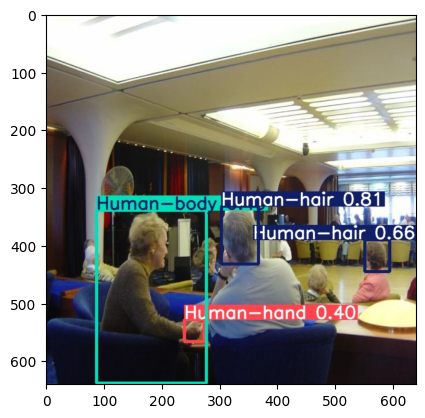

In [15]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/detect/exp/00c243073698dda6_jpg.rf.9fbe9a674fb6e5b2436f907425a74d59.jpg')
plt.imshow(img)
plt.show()

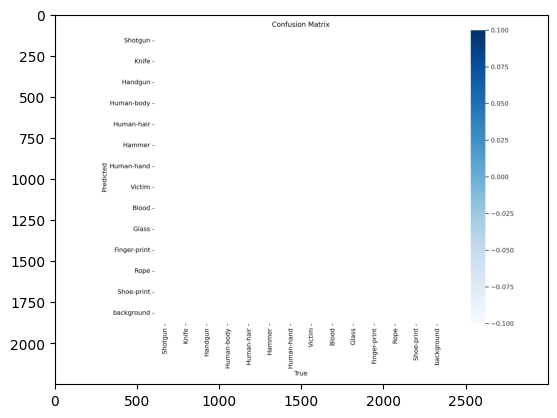

In [16]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/train/exp/confusion_matrix.png')
plt.imshow(img)
plt.show()

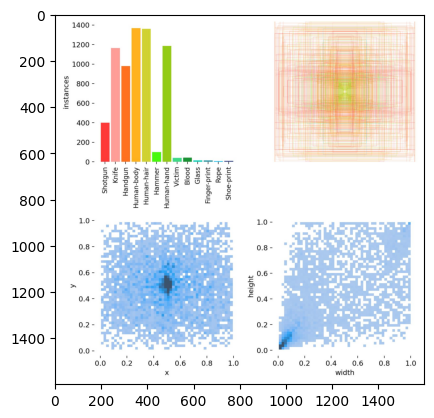

In [17]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/train/exp/labels.jpg')
plt.imshow(img)
plt.show()

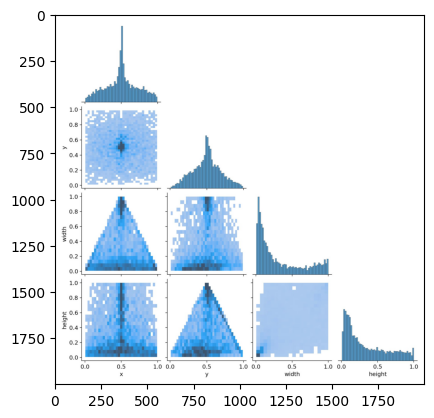

In [18]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/train/exp/labels_correlogram.jpg')
plt.imshow(img)
plt.show()

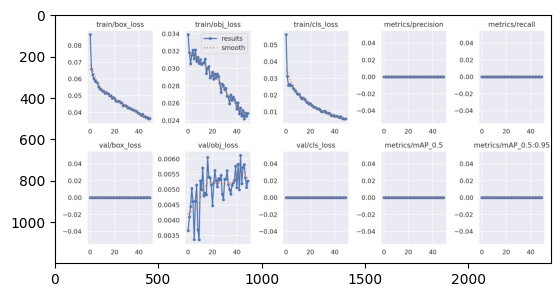

In [19]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/train/exp/results.png')
plt.imshow(img)
plt.show()

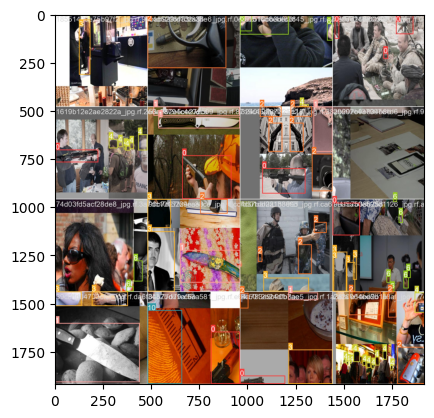

In [20]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/train/exp/train_batch0.jpg')
plt.imshow(img)
plt.show()

In [21]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /kaggle/working/yolov5/data/images/test/00141962b7815d54_jpg.rf.b361d5994e31b3123810af4d1f16c4f6.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/data/images/test/00141962b7815d54_jpg.rf.b361d5994e31b3123810af4d1f16c4f6.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /kaggle/working/yolov5/data/images/test/00141962b7815d54_jpg.rf.b361d5994e31b3123810af4d1f16c4f6.jpg: 640x640 1 Shotgun, 1 Handgun, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 147.9ms NMS per image at shape (1, 3, 64

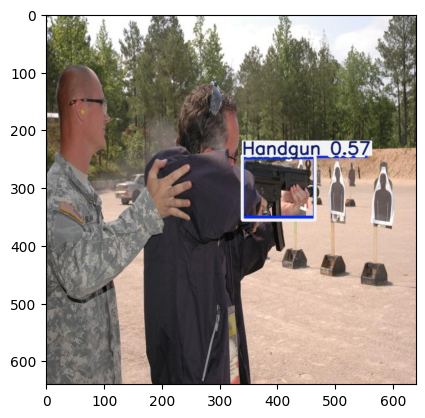

In [22]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/kaggle/working/yolov5/runs/detect/exp2/00141962b7815d54_jpg.rf.b361d5994e31b3123810af4d1f16c4f6.jpg')
plt.imshow(img)
plt.show()

Columns in dataset: Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')


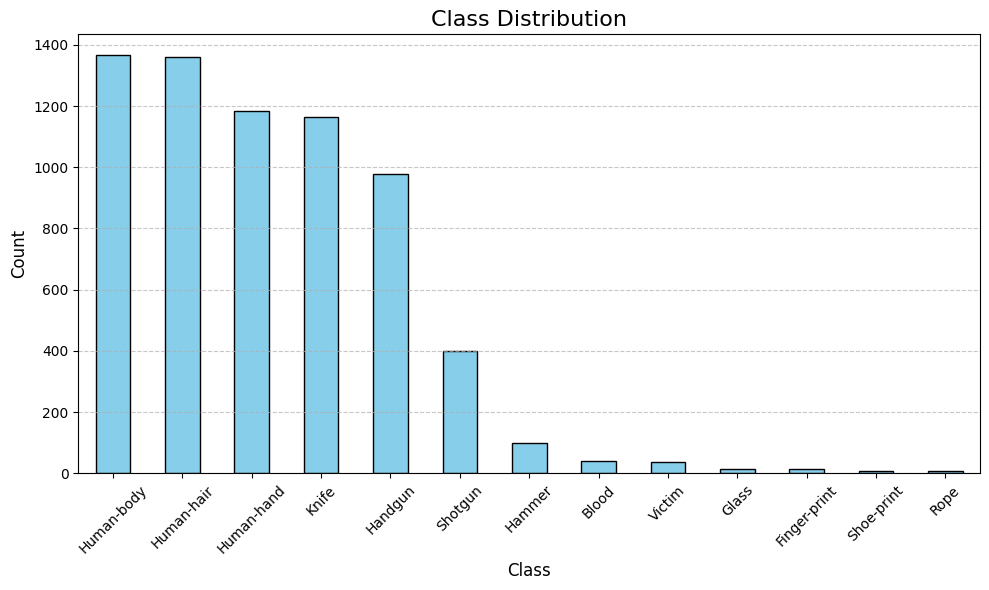

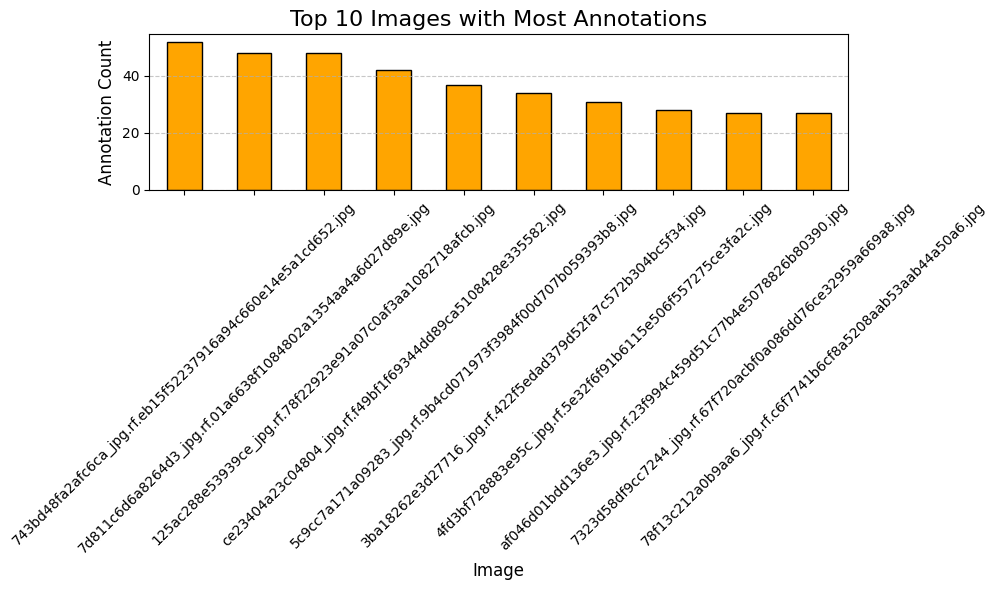

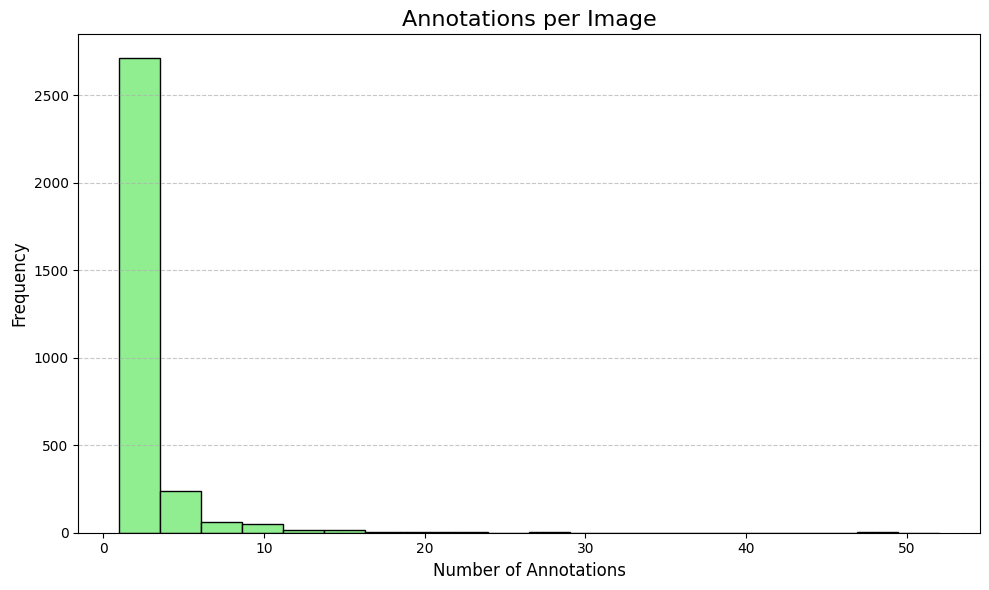

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load dataset annotation CSV (replace with your actual CSV path)
csv_path = '/kaggle/input/train-data/_annotations.csv'
df = pd.read_csv(csv_path)

# Ensure your CSV has necessary columns (e.g., class, image, etc.)
print("Columns in dataset:", df.columns)

# 1. Label/Class Distribution
plt.figure(figsize=(10, 6))
class_counts = df['class'].value_counts()  # Replace 'class' with your class column
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save figure at 300 DPI
plt.savefig('/kaggle/working/class_distribution.png', dpi=300)
plt.show()

# 2. Images with Most Annotations
plt.figure(figsize=(10, 6))
image_counts = df['filename'].value_counts().head(10)  # Replace 'image' with your image column
image_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Images with Most Annotations", fontsize=16)
plt.xlabel("Image", fontsize=12)
plt.ylabel("Annotation Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save figure at 300 DPI
plt.savefig('/kaggle/working/top_images.png', dpi=300)
plt.show()

# 3. Annotations Per Image
plt.figure(figsize=(10, 6))
df['filename'].value_counts().plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title("Annotations per Image", fontsize=16)
plt.xlabel("Number of Annotations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save figure at 300 DPI
plt.savefig('/kaggle/working/annotations_per_image.png', dpi=300)
plt.show()

In [24]:
import pandas as pd
valid_path = '/kaggle/working/yolov5/runs/train/exp/results.csv'
annotations1 = pd.read_csv(valid_path)
annotations1.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.086447,0.033906,0.056104,0,0,0,0,0,0.003658,0,0.070153,0.003316,0.003316
1,1,0.065836,0.031823,0.031112,0,0,0,0,0,0.004107,0,0.040021,0.006518,0.006518
2,2,0.062441,0.030539,0.025827,0,0,0,0,0,0.004439,0,0.009758,0.009588,0.009588
3,3,0.060135,0.031547,0.026366,0,0,0,0,0,0.005032,0,0.009406,0.009406,0.009406
4,4,0.058707,0.032106,0.025646,0,0,0,0,0,0.004607,0,0.009406,0.009406,0.009406


In [25]:
!python detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --source /kaggle/working/yolov5/data/images/test --save-txt

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/447 /kaggle/working/yolov5/data/images/test/00141962b7815d54_jpg.rf.b361d5994e31b3123810af4d1f16c4f6.jpg: 640x640 1 Shotgun, 1 Handgun, 11.5ms
image 2/447 /kaggle/working/yolov5/data/images/test/003d22c8b3ba23c2_jpg.rf.64f6957eedda6a7ff2af44279601d83d.jpg: 640x640